# Action potential model

An action potential consists of a rapid rise (depolarization) and return to the resting value (repolarization) of a membrane potential (difference of potential between the interior and the exterior of a cell). This depolarization-polarization cycle, which characterized excitable cells, drives mechanisms like cell contraction or neuron message passing.

In cardiac cells, the action potential is characterized by:
1. an upstroke, which characterizes the depolarization, moving the membrane potential from a resting value (around -84 mV) to a positive value (around 24 mV);
2. an early depolarization, with a first rapid reduction towards the plateau;
3. plateau phase, where the membrane potential slowly reduces, protecting the cell from being depolarized again;
4. final repolarization, restoring the membrane potential to the resting value.

See, [this paper](https://www.ahajournals.org/doi/full/10.1161/CIRCEP.108.789081) for further details.

Today, we will review some basic ODE ionic models of an action potential.

In [1]:
# imports

import numpy as np
import matplotlib.pyplot as plt

The action potential $u(t)$ (adimensionalized) is usually modeled as a non-linear ODE of the form

$ u(t)' = I_{ion}(u(t)) + I_{app}(t)  \quad t \in (0,T]$

with given initial condition $u(0) = u_0$. Here, $I_{app}$ represent an applied stimulus, while $I_{ion}$ is a the current generated by the exchange of ions between the cell membrane.

The simplest phenomenological model descibes $I_{ion}$ as a cubic non-linear term that depends on $u$, but it enables only the simulation of the depolarization mechanism.


Text(0, 0.5, 'u [adimensional]')

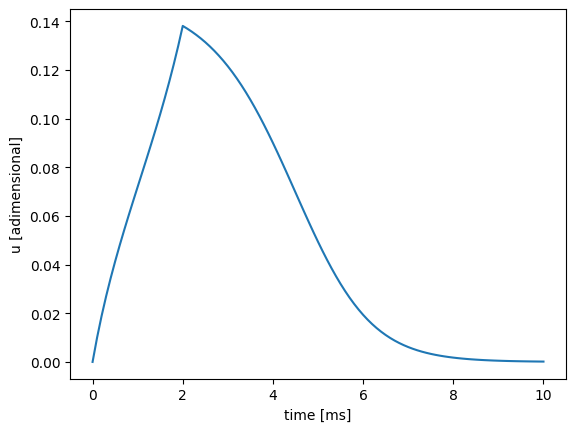

In [3]:

# time discretization
Nt = 100
dt = 10/Nt
K = 8
I_app_intensity = 0.10

u = np.zeros(Nt+1)
t = np.arange(0,(Nt+0.5)*dt,dt)

# explicit Euler update
for i in range(Nt):
    u[i+1] = u[i] + dt*( K* u[i]*(0.15-u[i])*(u[i]-1.0) + I_app_intensity*np.float32(i<20) )
    
plt.plot(t,u)
plt.xlabel('time [ms]')
plt.ylabel('u [adimensional]')



Task 1: Which is the graph of the function $I_{app}(t)$. Which is the minimal value of I_app_intensity that generate a depolarization?


The Fitzhug-Nagumo model is one of the simpliest model for an action potential. It consists of two equations:

$ u(t)' = K u(t)(u(t)-\alpha)(1-u(t)) - w(t) + I_{app}(t)  \quad t \in (0,T]$

$ w(t)' =  \epsilon (u(t)-\gamma w(t))   $,

where $w(t)$ is a recovery variable that controls the repolarization process.

Text(0, 0.5, 'u [adimensional]')

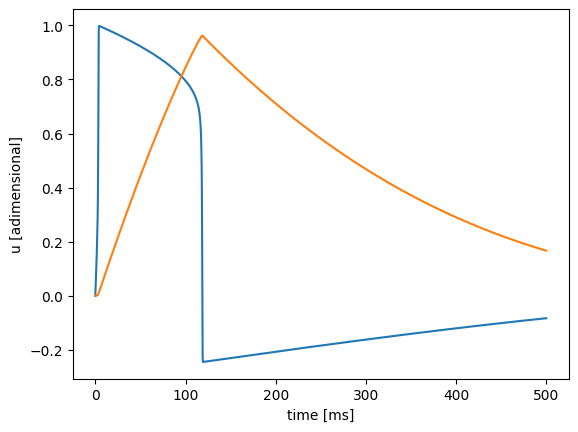

In [5]:

# time discretization
dt = 0.1
Tf = 500
Nt = np.int32(Tf/dt)

# physical coefficient
K = 8
I_app_intensity = 0.125
epsilon = 0.01
gamma = 0.1

u = np.zeros(Nt+1)
w = np.zeros(Nt+1)
t = np.arange(0,(Nt+0.5)*dt,dt)

# explicit Euler update
for i in range(Nt):
    u[i+1] = u[i] + dt*( K* u[i]*(0.15-u[i])*(u[i]-1.0) - w[i] + I_app_intensity*np.float32(i<20) )
    w[i+1] = w[i] + dt* epsilon* ( u[i] - gamma*w[i] )


plt.plot(t,u)
plt.plot(t,w)
plt.xlabel('time [ms]')
plt.ylabel('u [adimensional]')

In [ ]:

# input parameters
tau_in = 0.3
tau_out = 5
tau_open = 40
tau_close = 60
v_gate = 0.13

delta_t = 0.1
t_vec = np.arange(0, 400, delta_t)
u_vec = 0*t_vec
w_vec = 1.0+0*t_vec

Ut = 0.0
Wt = 1.0

for i in range(4000):

    J_in = Wt*(Ut*Ut*(1.0-Ut))/tau_in
    J_out = - Ut/tau_out
    g_ion = ((1-Wt)/tau_open)*(Ut<v_gate) + ((-Wt)/tau_close)*(Ut>v_gate)
    
    Ut = Ut + delta_t * ( J_in + J_out + 0.1*(i<30) )
    Wt = Wt + delta_t *  g_ion

    u_vec[i] = Ut
    w_vec[i] = Wt


plt.plot(t_vec,u_vec)
plt.plot(t_vec,w_vec)
plt.xlabel('time [ms]')
plt.ylabel('u [adimensional]')